In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./survey_results_public.csv")

Salary
(0.0, 10000.0]          6.608696
(10000.0, 20000.0]      7.285714
(20000.0, 30000.0]      7.156250
(30000.0, 40000.0]      6.987952
(40000.0, 50000.0]      6.484277
(50000.0, 60000.0]      7.017182
(60000.0, 70000.0]      6.915761
(70000.0, 80000.0]      7.053528
(80000.0, 90000.0]      7.014599
(90000.0, 100000.0]     7.155844
(100000.0, 110000.0]    7.054830
(110000.0, 120000.0]    7.121212
(120000.0, 130000.0]    7.453061
(130000.0, 140000.0]    7.600000
(140000.0, 150000.0]    7.260355
(150000.0, 160000.0]    7.645833
(160000.0, 170000.0]    7.517241
(170000.0, 180000.0]    7.500000
(180000.0, 190000.0]    7.947368
(190000.0, 200000.0]    7.888889
Name: JobSatisfaction, dtype: float64 Salary
(0.0, 10000.0]          2.675463
(10000.0, 20000.0]      2.493949
(20000.0, 30000.0]      2.096224
(30000.0, 40000.0]      2.350371
(40000.0, 50000.0]      2.407413
(50000.0, 60000.0]      2.256725
(60000.0, 70000.0]      2.182659
(70000.0, 80000.0]      2.070008
(80000.0, 90000.0]      

[(4.0, 10.0)]

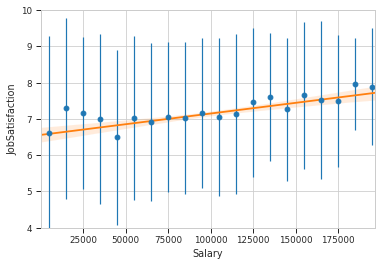

In [4]:
q_s = df.query("Professional == 'Professional developer' and Country == 'United States' and Salary > 1 and Salary <= 200000 ")
#q = df.query("Professional == 'Professional developer' and Country == 'United States' and Salary > 60000 and Salary <= 110000 ")
#q = df.query("Professional == 'Professional developer' and Country == 'Germany' and Salary > 1 and Salary <= 200000 ")
#q = df.query("Professional == 'Professional developer' and Country == 'United Kingdom' and Salary > 1 and Salary <= 200000 ")
q_s = q_s[['Salary', 'JobSatisfaction']].dropna()

bins = np.linspace(0, 200000, 21) #create bin of size 20000
group = q_s.groupby(pd.cut(q_s.Salary, bins)) # group data by bins

#plot mean of bins with std_err
plot_centers = (bins [:-1] + bins [1:])/2
plot_val_mean = group.JobSatisfaction.mean()
plot_val_std = group.JobSatisfaction.std()
plt.errorbar(plot_centers, plot_val_mean, plot_val_std, linestyle='None', marker='o')

#show bin vals
print(plot_val_mean,plot_val_std)

#plot reg line
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style( {'xtick.bottom': True, 'ytick.left': True})
ax = sns.regplot(x="Salary", y="JobSatisfaction", marker=" ", order=1, data=q_s)
ax.set(ylim=(4,10))

YearsProgram
1     7.916667
2     7.218750
3     7.422018
4     6.733696
5     7.183575
6     6.763285
7     6.747126
8     7.127389
9     7.058394
10    7.058333
11    7.187919
12    7.160000
13    6.905983
14    7.229167
15    7.291892
16    7.128378
17    6.950000
18    7.233871
19    6.791667
20    7.411765
21    7.254826
Name: JobSatisfaction, dtype: float64 YearsProgram
1     2.778434
2     2.126692
3     1.901722
4     2.367761
5     2.042063
6     2.226714
7     2.246222
8     1.876734
9     2.202159
10    2.083190
11    1.991092
12    2.283885
13    2.345145
14    2.095002
15    2.095852
16    2.080948
17    2.194460
18    2.409699
19    2.257616
20    1.829197
21    2.085776
Name: JobSatisfaction, dtype: float64


[(4.0, 10.0)]

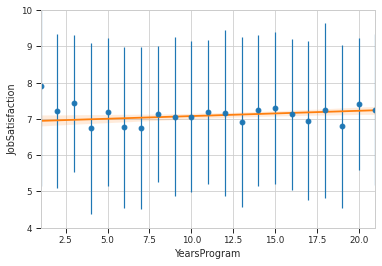

In [5]:
res = df.groupby(['YearsProgram']).mean()['JobSatisfaction'].sort_values().dropna()
mapping ={ "Less than a year": 1,
           "1 to 2 years": 2,
         "2 to 3 years": 3,
         "3 to 4 years": 4,
         "4 to 5 years": 5,
         "5 to 6 years": 6,
         "6 to 7 years": 7,
         "7 to 8 years": 8,
         "8 to 9 years": 9,
         "9 to 10 years": 10,
         "10 to 11 years": 11,
         "11 to 12 years": 12,
         "12 to 13 years": 13,
         "13 to 14 years": 14,
         "14 to 15 years": 15,
         "15 to 16 years": 16,
         "16 to 17 years": 17,
         "17 to 18 years": 18,
         "18 to 19 years": 19,
         "19 to 20 years": 20,
         "20 or more years": 21}

q_yp = df.query("Professional == 'Professional developer' and Country == 'United States' and Salary > 1 and Salary <= 200000 ")
#q = df.query("Professional == 'Professional developer' and Salary > 1 and Salary <= 200000 ")

#drop NaN on 'YearsProgram' and 'JobSatisfaction'
q_yp = q_yp[['YearsProgram', 'JobSatisfaction']].dropna()

#map ints on categorical 'YearsProgram' vals
q_yp = q_yp.replace({'YearsProgram': mapping})

#group by YearsProgram
group = q_yp.groupby(q_yp.YearsProgram)


#plot mean of groups with std_err
plot_centers = list(range(1,22,1))
plot_val_mean= group.JobSatisfaction.mean()
plot_val_std = group.JobSatisfaction.std()
plt.errorbar(plot_centers, plot_val_mean, plot_val_std, linestyle='None', marker='o')

#show bin vals
print(plot_val_mean,plot_val_std)

#plot reg line between 'YearsProgram' and 'JobSatisfaction'
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style( {'xtick.bottom': True, 'ytick.left': True})
ax = sns.regplot(x="YearsProgram", y="JobSatisfaction", marker=" ", order=1, data=q_yp)
ax.set(ylim=(4,10))


YearsProgram
1.0      65291.666667
2.0      68854.765625
3.0      67931.636364
4.0      71827.794960
5.0      72625.841346
6.0      77756.367443
7.0      81463.017143
8.0      81514.668790
9.0      83336.328571
10.0     85454.365145
11.0     87359.466667
12.0     94719.064000
13.0     92040.220339
14.0    100366.666667
15.0    100572.533107
16.0    103080.370861
17.0    101457.420000
18.0    111983.903226
19.0    105334.452055
20.0    111956.756303
21.0    117783.475753
Name: Salary, dtype: float64 YearsProgram
1.0     17351.261853
2.0     27140.922675
3.0     24076.843705
4.0     26295.480385
5.0     23494.388465
6.0     24218.723542
7.0     29633.209256
8.0     27219.754203
9.0     27890.330851
10.0    30116.232495
11.0    31012.811083
12.0    30069.009783
13.0    30010.673178
14.0    31819.317756
15.0    31195.082930
16.0    30806.390150
17.0    33258.085668
18.0    32463.186642
19.0    32405.905744
20.0    31250.305397
21.0    33565.726495
Name: Salary, dtype: float64


[(0.0, 200000.0)]

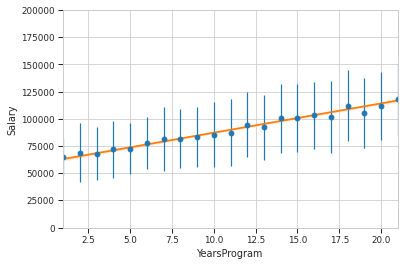

In [6]:
q_yp2 = df.query("Professional == 'Professional developer' and Country == 'United States'")

#map ints on categorical 'YearsProgram' vals
q_yp2 = q_yp2.replace({'YearsProgram': mapping})

#drop NaN on 'YearsProgram' and 'Salary'
q_yp2 = q_yp2[['YearsProgram', 'Salary']].dropna()

#group by YearsProgram
group = q_yp2.groupby(q_yp2.YearsProgram)

#plot mean of groups with std_err
plot_centers = list(range(1,22,1))
plot_val_mean = group.Salary.mean()
plot_val_std = group.Salary.std()
plt.errorbar(plot_centers, plot_val_mean, plot_val_std, linestyle='None', marker='o'  )

#show bin vals
print(plot_val_mean,plot_val_std )

#plot reg line between 'YearsProgram' and 'Salary'
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style( {'xtick.bottom': True, 'ytick.left': True})
ax = sns.regplot(x="YearsProgram", y="Salary", marker=" ", order=1, data=q_yp2)
ax.set(ylim=(0,200000))


Salary
(0.0, 10000.0]               NaN
(10000.0, 20000.0]           NaN
(20000.0, 30000.0]           NaN
(30000.0, 40000.0]           NaN
(40000.0, 50000.0]           NaN
(50000.0, 60000.0]      7.017182
(60000.0, 70000.0]      6.915761
(70000.0, 80000.0]      7.053528
(80000.0, 90000.0]      7.014599
(90000.0, 100000.0]     7.155844
(100000.0, 110000.0]    7.054830
(110000.0, 120000.0]    7.121212
(120000.0, 130000.0]    7.453061
(130000.0, 140000.0]         NaN
(140000.0, 150000.0]         NaN
(150000.0, 160000.0]         NaN
(160000.0, 170000.0]         NaN
(170000.0, 180000.0]         NaN
(180000.0, 190000.0]         NaN
(190000.0, 200000.0]         NaN
Name: JobSatisfaction, dtype: float64 Salary
(0.0, 10000.0]               NaN
(10000.0, 20000.0]           NaN
(20000.0, 30000.0]           NaN
(30000.0, 40000.0]           NaN
(40000.0, 50000.0]           NaN
(50000.0, 60000.0]      2.256725
(60000.0, 70000.0]      2.182659
(70000.0, 80000.0]      2.070008
(80000.0, 90000.0]      

[(4.0, 10.0)]

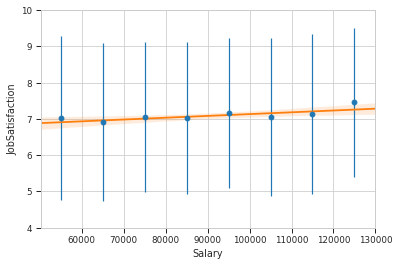

In [7]:
q_s2 = df.query("Professional == 'Professional developer' and Country == 'United States' and Salary > 50000 and Salary <= 130000 ")
#q = df.query("Professional == 'Professional developer' and Country == 'United States' and Salary > 60000 and Salary <= 110000 ")
#q = df.query("Professional == 'Professional developer' and Country == 'Germany' and Salary > 1 and Salary <= 200000 ")
#q = df.query("Professional == 'Professional developer' and Country == 'United Kingdom' and Salary > 1 and Salary <= 200000 ")
q_s2 = q_s2[['Salary', 'JobSatisfaction']].dropna()

bins = np.linspace(0, 200000, 21) #create bin of size 20000
group = q_s2.groupby(pd.cut(q_s2.Salary, bins)) # group data by bins

#plot mean of bins with std_err
plot_centers = (bins [:-1] + bins [1:])/2
plot_val_mean = group.JobSatisfaction.mean()
plot_val_std = group.JobSatisfaction.std()
plt.errorbar(plot_centers, plot_val_mean, plot_val_std, linestyle='None', marker='o'  )

#show group vals
print(plot_val_mean,plot_val_std)

#plot reg line
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style( {'xtick.bottom': True, 'ytick.left': True})
ax = sns.regplot(x="Salary", y="JobSatisfaction", marker=" ", order=1, data=q_s2)
ax.set(ylim=(4,10))